# Objective:

The objective of this notebook is to prepare the data for modelling (in notebook 3. Modelling) by viewing, cleaning and engineering features. I chose to use 1 notebook for cleaning and feature engineering because for this project, cleaning the data was simultaneous with feature engineering.

---

# Import libraries

First, we need to import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import plotly.offline as py
import statsmodels.api as sm
import pymysql
import matplotlib
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from matplotlib.patches import Patch
import math
import itertools
import seaborn as sns
import random 
from statsmodels.api import tsa
import warnings
warnings.filterwarnings("ignore")

---

# Viewing the main dataframe

Then, we can view the main dataframe.

In [2]:
invoices = pd.read_csv('data/invoices.csv')
invoices.head()

,BRANCH_ID,BRANCH_NAME,INVOICE_NO,INVOICE_DATE,PRODUCT_NUMBER,QUANTITY_SOLD,PRICE_SOLD,DISCOUNT_TEXT,DISCOUNT_CODE,PRODUCT_NAME,UNIT,COST,RETAIL_PRICE,CATEGORY
0,1636,Dark Specialty Coffee - North EDSA,1,1/12/2017 12:47,262786,1.0,0.0,NaN,NaN,Wild Cherry Cranberry,PC,0.0000,0.0,20 ADDONS
1,1636,Dark Specialty Coffee - North EDSA,1,1/12/2017 12:47,262924,1.0,160.0,NaN,NaN,Iced Flavor Fresh Herbs Pandan continental flavor,PC,0.0000,160.0,COLD BREWED HEALTH TEA
2,1636,Dark Specialty Coffee - North EDSA,2,1/12/2017 12:51,262800,1.0,160.0,NaN,NaN,Atok Benguet ( R ),PC,15.7100,160.0,SPECIALTY COFFEE B
3,1636,Dark Specialty Coffee - North EDSA,2,1/12/2017 12:51,262812,1.0,150.0,NaN,NaN,Cold brew Coffee Vanilla (R),PC,90.4772,150.0,COLD BREWED COFFEE
4,1636,Dark Specialty Coffee - North EDSA,2,1/12/2017 12:51,262944,12.0,0.0,0.00%,NaN,Local Atokape Oliver Single Orgin Coffee Beans,GRAM,1.0100,0.0,RAW MATERIAL COFFEE


In [3]:
invoices.shape

(263889, 14)

### Since this data does not have a unique ID for each row, we can create one using the index.

In [32]:
# Let's make sure the df is sorted by date first
invoices = invoices.sort_values(by='INVOICE_DATE',ascending=True)
invoices

,INVOICE_NO,INVOICE_DATE,PRODUCT_NUMBER,QUANTITY_SOLD,PRICE_SOLD,PRODUCT_NAME,COST,RETAIL_PRICE,CATEGORY,ID
1,1,2017-01-12 12:47:00,262924,1.0,160.0,Iced Flavor Fresh Herbs Pandan continental flavor,0.00000,160.0,COLD BREWED HEALTH TEA,1
2,2,2017-01-12 12:51:00,262800,1.0,160.0,Atok Benguet ( R ),15.71000,160.0,SPECIALTY COFFEE B,2
3,2,2017-01-12 12:51:00,262812,1.0,150.0,Cold brew Coffee Vanilla (R),90.47720,150.0,COLD BREWED COFFEE,3
12,3,2017-01-12 12:56:00,262921,1.0,160.0,Iced Flavor Fresh Herbs Basil continental flavor,0.00000,160.0,COLD BREWED HEALTH TEA,12
13,4,2017-01-12 13:27:00,262751,1.0,170.0,Caramel Coffee Blended(S),5767.81000,170.0,ICE BLENDED,13
...,...,...,...,...,...,...,...,...,...,...
259242,30622,2020-12-10 15:26:00,262745,1.0,175.0,Iced Cafe Mocha (L),25956.32636,175.0,ICED COFFEE,259242
259255,30623,2020-12-10 15:40:00,262741,1.0,175.0,Iced Caramel macchiato (L),17299.56186,175.0,ICED COFFEE,259255
259278,30623,2020-12-10 15:40:00,268582,1.0,165.0,"Carrot Cake \Slice\""""",53.00000,165.0,CAKES,259278
259254,30623,2020-12-10 15:40:00,262725,1.0,175.0,caramel Macchiato (L),25189.00836,175.0,HOT ESPRESSO,259254


In [34]:
### Now, let's create the index

In [35]:
invoices["ID"]=invoices.index

#### We can check to see if the number of unique IDs match the number of rows

In [36]:
invoices["ID"].nunique()

53883

#### Here is our new shape, with 1 additional feature

In [37]:
invoices.shape

(53883, 10)

#### Now, lets check the data type for each feature

In [38]:
invoices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53883 entries, 1 to 259279
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   INVOICE_NO      53883 non-null  int64         
 1   INVOICE_DATE    53883 non-null  datetime64[ns]
 2   PRODUCT_NUMBER  53883 non-null  int64         
 3   QUANTITY_SOLD   53883 non-null  float64       
 4   PRICE_SOLD      53883 non-null  float64       
 5   PRODUCT_NAME    53883 non-null  object        
 6   COST            53883 non-null  float64       
 7   RETAIL_PRICE    53883 non-null  float64       
 8   CATEGORY        53883 non-null  object        
 9   ID              53883 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 4.5+ MB


#### Above we can see that we need to change the data type of some features (i.e. `INVOICE_NO` needs to be datetime). However, I will check for null values first so we do not work on features that we might drop anyway.

# Checking for null values

#### We can view the number of rows that are null in each feature

In [39]:
invoices.isna().sum()

INVOICE_NO        0
INVOICE_DATE      0
PRODUCT_NUMBER    0
QUANTITY_SOLD     0
PRICE_SOLD        0
PRODUCT_NAME      0
COST              0
RETAIL_PRICE      0
CATEGORY          0
ID                0
dtype: int64

#### Since several of these features are not necessary in our analysis, or contain duplicate information, we can drop them

In [40]:
columns = ['BRANCH_NAME', 'BRANCH_ID', 'UNIT', 'DISCOUNT_CODE', 'DISCOUNT_TEXT']

invoices.drop(columns, axis=1, inplace = True)
invoices.info()

KeyError: "['BRANCH_NAME' 'BRANCH_ID' 'UNIT' 'DISCOUNT_CODE' 'DISCOUNT_TEXT'] not found in axis"

#### Above is the list of our remaining columns

# Changing Data type

Now, we can change the data type of the remaining columns

In [ ]:
invoices['INVOICE_DATE'] = invoices['INVOICE_DATE'].astype('datetime64')
#pd.to_datetime(df['Datetime'], format="%m/%d/%Y, %H:%M:%S")

#### We can see if the transformation worked by checking the data type again.

In [ ]:
invoices.dtypes

#### Now, our features have the correct data types.

Let's view the data again.

In [41]:
invoices.head()

,INVOICE_NO,INVOICE_DATE,PRODUCT_NUMBER,QUANTITY_SOLD,PRICE_SOLD,PRODUCT_NAME,COST,RETAIL_PRICE,CATEGORY,ID
1,1,2017-01-12 12:47:00,262924,1.0,160.0,Iced Flavor Fresh Herbs Pandan continental flavor,0.0000,160.0,COLD BREWED HEALTH TEA,1
2,2,2017-01-12 12:51:00,262800,1.0,160.0,Atok Benguet ( R ),15.7100,160.0,SPECIALTY COFFEE B,2
3,2,2017-01-12 12:51:00,262812,1.0,150.0,Cold brew Coffee Vanilla (R),90.4772,150.0,COLD BREWED COFFEE,3
12,3,2017-01-12 12:56:00,262921,1.0,160.0,Iced Flavor Fresh Herbs Basil continental flavor,0.0000,160.0,COLD BREWED HEALTH TEA,12
13,4,2017-01-12 13:27:00,262751,1.0,170.0,Caramel Coffee Blended(S),5767.8100,170.0,ICE BLENDED,13


#### Here is what changed in our main df.

In [42]:
print(f'Our shape has dropped to {invoices.shape[0]} rows and {invoices.shape[1]} columns')

Our shape has dropped to 53883 rows and 10 columns


#### What is the time period of our data?
Let's check the number of rows per year.

In [43]:
invoices['INVOICE_DATE'].groupby(invoices.INVOICE_DATE.dt.year).agg('count')

INVOICE_DATE
2017     1991
2018    22472
2019    23541
2020     5879
Name: INVOICE_DATE, dtype: int64

---

# Feature Engineering & Further Cleaning

Since I need to isolate cakes, let's view the categories and see if we can use this to find the product we are focusing on.

In [44]:
invoices['CATEGORY'].unique()

array(['COLD BREWED HEALTH TEA', 'SPECIALTY COFFEE B',
       'COLD BREWED COFFEE', 'ICE BLENDED', '20 ADDONS', 'BOTTLED WATER',
       'KOMBUCHA ', 'ICED COFFEE', 'HOT ESPRESSO', 'CAKES',
       'HAND CRAFTED HOT CHOCOLATE', 'HAND CRAFTED ICED CHOCOLATE',
       'SPECIALTY COFFEE A', 'LOOSE LEAF PREMIUM TEAS HOT',
       'HAND CRAFTED BLENDED CHOCOLATE ', '11 Cookies Gourmet ',
       'Cookies Gourmet ', 'PREMIUM TEA LATTE', '4 SINGLE ORIGIN BEANS',
       'BOTTLED DRINKS', '17 BOTTLED DRINKS', 'Savory', '12 CAKES',
       'Bars', 'ADDONS', 'BOTTLED COLD BREW HEALTH TEA',
       'Tea Retail Pack', 'Brownies', '9 LOOSE LEAF PREMIUM TEAS HOT',
       'SINGLE ORIGIN BEANS', 'CACAO BLOCKS', '13 Savory',
       'Monster Cookies', 'Muffin'], dtype=object)

### While we could easily do this code to select just cakes, I chose to recategorize the dataframe to prepare it for future forecasting and get in some cleaning practice.

In [45]:
# We can view the cakes with this code
invoices[invoices.CATEGORY.str.contains('CAKES')]

,INVOICE_NO,INVOICE_DATE,PRODUCT_NUMBER,QUANTITY_SOLD,PRICE_SOLD,PRODUCT_NAME,COST,RETAIL_PRICE,CATEGORY,ID
36,6,2017-01-12 14:02:00,263287,1.0,145.0,"2X2\ Square Peanut Butter Cheesecake""",0.0,145.0,CAKES,36
59,9,2017-01-12 14:23:00,263287,1.0,145.0,"2X2\ Square Peanut Butter Cheesecake""",0.0,145.0,CAKES,59
72,10,2017-01-12 14:39:00,263290,2.0,55.0,Dark Choco Caramel Sticks,640.0,55.0,CAKES,72
71,10,2017-01-12 14:39:00,263287,1.0,145.0,"2X2\ Square Peanut Butter Cheesecake""",0.0,145.0,CAKES,71
90,12,2017-01-12 14:56:00,263540,1.0,295.0,"9\ New York Cheese Cake Slice""",0.0,295.0,CAKES,90
...,...,...,...,...,...,...,...,...,...,...
256794,30413,2020-12-09 15:36:00,320621,1.0,135.0,Rock Salted Chocolate Cake Slice,55.0,135.0,CAKES,256794
256795,30414,2020-12-09 15:37:00,320623,1.0,135.0,Dulce De Leche Cake Slice,55.0,135.0,CAKES,256795
259201,30617,2020-12-10 12:26:00,283928,1.0,145.0,Red Velvet Slice,42.5,145.0,CAKES,259201
259213,30618,2020-12-10 14:47:00,283928,1.0,145.0,Red Velvet Slice,42.5,145.0,CAKES,259213


In [46]:
# We can view the cakes shape with this code
invoices[invoices.CATEGORY.str.contains('CAKES')].shape

(5374, 10)

## We need to recategorize and remove non-perishable products and raw materials in this list to prepare all products for forecasting.

#### Removing raw materials

In [47]:
invoices = invoices[~invoices.CATEGORY.str.contains("RAW")]

In [48]:
# Checking if it worked
invoices['CATEGORY'].unique()

array(['COLD BREWED HEALTH TEA', 'SPECIALTY COFFEE B',
       'COLD BREWED COFFEE', 'ICE BLENDED', '20 ADDONS', 'BOTTLED WATER',
       'KOMBUCHA ', 'ICED COFFEE', 'HOT ESPRESSO', 'CAKES',
       'HAND CRAFTED HOT CHOCOLATE', 'HAND CRAFTED ICED CHOCOLATE',
       'SPECIALTY COFFEE A', 'LOOSE LEAF PREMIUM TEAS HOT',
       'HAND CRAFTED BLENDED CHOCOLATE ', '11 Cookies Gourmet ',
       'Cookies Gourmet ', 'PREMIUM TEA LATTE', '4 SINGLE ORIGIN BEANS',
       'BOTTLED DRINKS', '17 BOTTLED DRINKS', 'Savory', '12 CAKES',
       'Bars', 'ADDONS', 'BOTTLED COLD BREW HEALTH TEA',
       'Tea Retail Pack', 'Brownies', '9 LOOSE LEAF PREMIUM TEAS HOT',
       'SINGLE ORIGIN BEANS', 'CACAO BLOCKS', '13 Savory',
       'Monster Cookies', 'Muffin'], dtype=object)

#### Looking deeper into a weirdly named category, `\\N`

In [49]:
invoices.loc[invoices['CATEGORY'] == '\\N'].head()

,INVOICE_NO,INVOICE_DATE,PRODUCT_NUMBER,QUANTITY_SOLD,PRICE_SOLD,PRODUCT_NAME,COST,RETAIL_PRICE,CATEGORY,ID


#### We can drop this since it is non-perishable

In [50]:
# replace with a word that can be dropped                                                
invoices = invoices.replace(r'\\N','Packaging', regex=True) 
##drop
invoices = invoices[~invoices.CATEGORY.str.contains("Packaging")]
#check it worked
invoices['CATEGORY'].unique()

array(['COLD BREWED HEALTH TEA', 'SPECIALTY COFFEE B',
       'COLD BREWED COFFEE', 'ICE BLENDED', '20 ADDONS', 'BOTTLED WATER',
       'KOMBUCHA ', 'ICED COFFEE', 'HOT ESPRESSO', 'CAKES',
       'HAND CRAFTED HOT CHOCOLATE', 'HAND CRAFTED ICED CHOCOLATE',
       'SPECIALTY COFFEE A', 'LOOSE LEAF PREMIUM TEAS HOT',
       'HAND CRAFTED BLENDED CHOCOLATE ', '11 Cookies Gourmet ',
       'Cookies Gourmet ', 'PREMIUM TEA LATTE', '4 SINGLE ORIGIN BEANS',
       'BOTTLED DRINKS', '17 BOTTLED DRINKS', 'Savory', '12 CAKES',
       'Bars', 'ADDONS', 'BOTTLED COLD BREW HEALTH TEA',
       'Tea Retail Pack', 'Brownies', '9 LOOSE LEAF PREMIUM TEAS HOT',
       'SINGLE ORIGIN BEANS', 'CACAO BLOCKS', '13 Savory',
       'Monster Cookies', 'Muffin'], dtype=object)

In [51]:
invoices = invoices[~invoices.CATEGORY.str.contains("Add-ons")]
invoices = invoices[~invoices.CATEGORY.str.contains("21 TAKE OUT ADDONS")]
invoices = invoices[~invoices.CATEGORY.str.contains("Coffee Accessories")]
invoices = invoices[~invoices.CATEGORY.str.contains("18 Coffee Accessories")]
invoices = invoices[~invoices.CATEGORY.str.contains('Anniversary Promo|19 PROMO|PROMO')]

#see if drop worked
invoices['CATEGORY'].unique()

array(['COLD BREWED HEALTH TEA', 'SPECIALTY COFFEE B',
       'COLD BREWED COFFEE', 'ICE BLENDED', '20 ADDONS', 'BOTTLED WATER',
       'KOMBUCHA ', 'ICED COFFEE', 'HOT ESPRESSO', 'CAKES',
       'HAND CRAFTED HOT CHOCOLATE', 'HAND CRAFTED ICED CHOCOLATE',
       'SPECIALTY COFFEE A', 'LOOSE LEAF PREMIUM TEAS HOT',
       'HAND CRAFTED BLENDED CHOCOLATE ', '11 Cookies Gourmet ',
       'Cookies Gourmet ', 'PREMIUM TEA LATTE', '4 SINGLE ORIGIN BEANS',
       'BOTTLED DRINKS', '17 BOTTLED DRINKS', 'Savory', '12 CAKES',
       'Bars', 'ADDONS', 'BOTTLED COLD BREW HEALTH TEA',
       'Tea Retail Pack', 'Brownies', '9 LOOSE LEAF PREMIUM TEAS HOT',
       'SINGLE ORIGIN BEANS', 'CACAO BLOCKS', '13 Savory',
       'Monster Cookies', 'Muffin'], dtype=object)

### Let's view the data

(53883, 10)


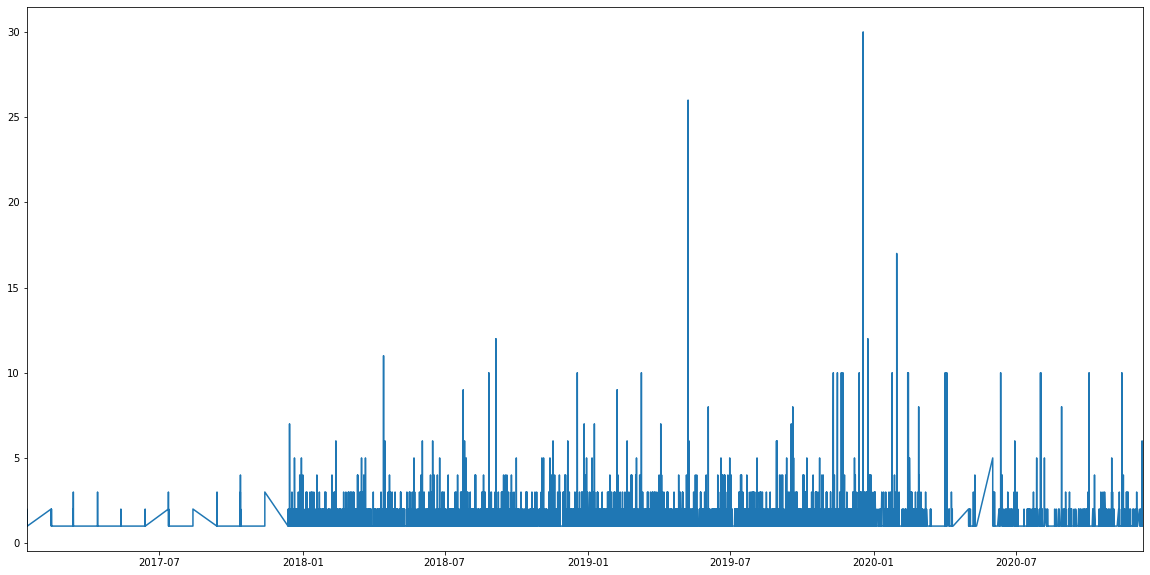

In [52]:
print(invoices.shape)

plt.figure(figsize=(20,10))
plt.plot(invoices['INVOICE_DATE'], invoices['QUANTITY_SOLD'])
plt.autoscale(enable=True, axis='x', tight=True)
plt.show();

### By viewing the graph above, we can see that the df contains negative values. I have asked the company for an explanation so I can better understand what this means, but they were not able to get back to me with the answer before the deadline of this project. I am still waiting for an answer. 

### For now, let us drop these unexplained negative sales.

In [54]:
invoices = invoices[invoices['QUANTITY_SOLD'] > 0 ]
invoices['CATEGORY'].unique()

array(['COLD BREWED HEALTH TEA', 'SPECIALTY COFFEE B',
       'COLD BREWED COFFEE', 'ICE BLENDED', '20 ADDONS', 'BOTTLED WATER',
       'KOMBUCHA ', 'ICED COFFEE', 'HOT ESPRESSO', 'CAKES',
       'HAND CRAFTED HOT CHOCOLATE', 'HAND CRAFTED ICED CHOCOLATE',
       'SPECIALTY COFFEE A', 'LOOSE LEAF PREMIUM TEAS HOT',
       'HAND CRAFTED BLENDED CHOCOLATE ', '11 Cookies Gourmet ',
       'Cookies Gourmet ', 'PREMIUM TEA LATTE', '4 SINGLE ORIGIN BEANS',
       'BOTTLED DRINKS', '17 BOTTLED DRINKS', 'Savory', '12 CAKES',
       'Bars', 'ADDONS', 'BOTTLED COLD BREW HEALTH TEA',
       'Tea Retail Pack', 'Brownies', '9 LOOSE LEAF PREMIUM TEAS HOT',
       'SINGLE ORIGIN BEANS', 'CACAO BLOCKS', '13 Savory',
       'Monster Cookies', 'Muffin'], dtype=object)

## Lets view the graph again to see if it worked.

(53883, 10)


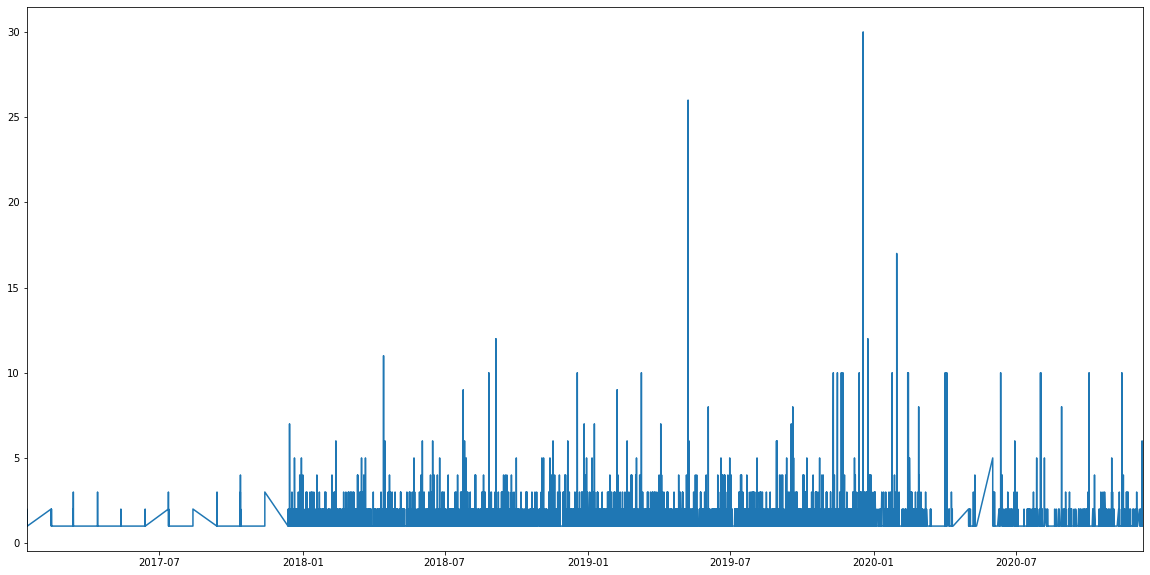

In [57]:
print(invoices.shape)

plt.figure(figsize=(20,10))
plt.plot(invoices['INVOICE_DATE'], invoices['QUANTITY_SOLD'])
plt.autoscale(enable=True, axis='x', tight=True)
plt.show();

### Now, lets recategorize all perishable products

### New Category and Subcategory
I have to redesign the category and subcategories because _____________. If the company had another table with all the product categories for every product, I could just merge the two tables.

Feature `Category`
* `Food`
* `Drinks`
* `Add-ons`
* `Promotions` --- because some are combos

Feature `Subcategory`
* `Cake`
* `Other Desserts`
* `Savory`
* `Coffee`
* `Tea`
* `Water`
* `Blended and Others`

In [58]:
#Renaming Food category
Food = ['Savory','CAKES','11 Cookies Gourmet','Bars', 'Brownies', 'CACAO BLOCKS','12 CAKES', '13 Savory','Monster Cookies', 'Cookies Gourmet',
       'Muffin']

invoices["CATEGORY"] = invoices["CATEGORY"].replace(Food,'Food', regex=True)
invoices["CATEGORY"] = invoices["CATEGORY"].replace('Food ','Food', regex=True)
invoices["CATEGORY"] = invoices["CATEGORY"].replace('12 Food','Food', regex=True)
invoices["CATEGORY"] = invoices["CATEGORY"].replace('13 Food','Food', regex=True)

#Renaming Drinks category
Drinks = ['HOT ESPRESSO','ICE BLENDED','ICED COFFEE','ICED COFFE', 'COLD BREWED HEALTH TEA', 'HAND CRAFTED HOT CHOCOLATE','SPECIALTY COFFEE A', 'SPECIALTY COFFEE B','HAND CRAFTED ICED CHOCOLATE', 'LOOSE LEAF PREMIUM TEAS HOT',
       '17 BOTTLED DRINKS','HAND CRAFTED BLENDED CHOCOLATE','COLD BREWED COFFEE','BOTTLED WATER','PREMIUM TEA LATTE','BOTTLED DRINKS','4 SINGLE ORIGIN BEANS','Tea Retail Pack', 'KOMBUCHA', 'SINGLE ORIGIN BEANS', "9 LOOSE LEAF PREMIUM TEAS HOT",'BOTTLED COLD BREW HEALTH TEA']

invoices["CATEGORY"] = invoices["CATEGORY"].replace(Drinks,'Drinks', regex=True)
invoices["CATEGORY"] = invoices["CATEGORY"].replace('Drinks ','Drinks', regex=True)
invoices["CATEGORY"] = invoices["CATEGORY"].replace('9 Drinks','Drinks', regex=True)

invoices["CATEGORY"].value_counts()

Drinks       34212
Food         15332
20 ADDONS     4312
ADDONS          27
Name: CATEGORY, dtype: int64

### Below is our new shape (originally 300,000 rows)

In [59]:
invoices.shape

(53883, 10)

# Subcategory
To create this new feature, I will separate the remaining data into different dataframes, then introduce the new feature for each dataframe. In the end, I will concatenate all dataframes together

### Let's first split the data into food and drinks

In [61]:
food = invoices[invoices['CATEGORY']=='Food']
food.head(2)

,INVOICE_NO,INVOICE_DATE,PRODUCT_NUMBER,QUANTITY_SOLD,PRICE_SOLD,PRODUCT_NAME,COST,RETAIL_PRICE,CATEGORY,ID
36,6,2017-01-12 14:02:00,263287,1.0,145.0,"2X2\ Square Peanut Butter Cheesecake""",0.0,145.0,Food,36
59,9,2017-01-12 14:23:00,263287,1.0,145.0,"2X2\ Square Peanut Butter Cheesecake""",0.0,145.0,Food,59


In [62]:
food.shape

(15332, 10)

In [63]:
drinks = invoices[invoices['CATEGORY']=='Drinks']
drinks.head(2)

,INVOICE_NO,INVOICE_DATE,PRODUCT_NUMBER,QUANTITY_SOLD,PRICE_SOLD,PRODUCT_NAME,COST,RETAIL_PRICE,CATEGORY,ID
1,1,2017-01-12 12:47:00,262924,1.0,160.0,Iced Flavor Fresh Herbs Pandan continental flavor,0.00,160.0,Drinks,1
2,2,2017-01-12 12:51:00,262800,1.0,160.0,Atok Benguet ( R ),15.71,160.0,Drinks,2


In [64]:
drinks.shape

(34212, 10)

## Now, within each df, let's recategorize based on the names of each product.

In [65]:
food['PRODUCT_NAME'].unique()

array(['2X2\\ Square Peanut Butter Cheesecake"',
       'Dark Choco Caramel Sticks', '9\\ New York Cheese Cake Slice"',
       'Dark and White Signature Cake SLICE',
       'Square German Choco Brownies',
       '9\\ BLUEBERRY SWIRL CHEESECAKE SLICE"',
       'Coconut Cream Cake SLICE', 'CHOCOLATE CHIP GOURMET COOKIES',
       'APRICOT ALMOND GOURMET COOKIES',
       'CHERRY DARK CHOCOLATE GOURMET COOKIES',
       'CRANBERRY WHITE CHOCOLATE GOURMET COOKIES',
       'MANGO COCONUT GOURMET COOKIES', 'Dark Peanut Butter Crunch',
       ' 6\\Dalandan Cheesecake Slice"', 'Triple Chocolate Kahlua Slice',
       'White Chocolate Nutella Crunch',
       '6\\ Blueberry Swirl Cheesecake Slice"',
       '9\\ New York Cheese Cake"',
       '8\\ Round Dark & White Signature Cake"',
       '8” New York Cheesecake Slice',
       'Dark & White Chocolate Chip Gourmet Cookies',
       'Double Layer German Chocolate Cakes \\Slice\\""',
       'German Chocolate Cake \\Slice\\""', 'Banana Loaf \\Slice\\""'

### Since we are focusing on cakes, let's make a subcategory exclusive to cakes

In [67]:
cakes = food[food['PRODUCT_NAME'].str.contains("Cake|Cheesecake|cake|CAKE|Cream|Cheese|Fudge|Sticks|SLICE|slice|Slice", na=False)]
cakes['PRODUCT_NAME'].unique()

array(['2X2\\ Square Peanut Butter Cheesecake"',
       'Dark Choco Caramel Sticks', '9\\ New York Cheese Cake Slice"',
       'Dark and White Signature Cake SLICE',
       '9\\ BLUEBERRY SWIRL CHEESECAKE SLICE"',
       'Coconut Cream Cake SLICE', ' 6\\Dalandan Cheesecake Slice"',
       'Triple Chocolate Kahlua Slice',
       '6\\ Blueberry Swirl Cheesecake Slice"',
       '9\\ New York Cheese Cake"',
       '8\\ Round Dark & White Signature Cake"',
       '8” New York Cheesecake Slice',
       'Double Layer German Chocolate Cakes \\Slice\\""',
       'German Chocolate Cake \\Slice\\""', 'Banana Loaf \\Slice\\""',
       'Dark Chocolate Melt Cake “Slice”',
       '8 “ Blueberry Cheesecake \\Slice\\""',
       'Dark Chocolate Caramel Melt cake “Slice”',
       'Carrot Cake \\Slice\\""',
       'Dark Chocolate Cream Cheese Cake  “Slice”', 'Red Velvet Slice',
       'Salted Caramel Cheesecake',
       'Rectangular Irish Sansrival \\Slice\\""',
       'Chocolate Peanut Butter Cake \\SLIC

In [68]:
cakes['Subcategory'] = 'Cakes'
cakes.head()

,INVOICE_NO,INVOICE_DATE,PRODUCT_NUMBER,QUANTITY_SOLD,PRICE_SOLD,PRODUCT_NAME,COST,RETAIL_PRICE,CATEGORY,ID,Subcategory
36,6,2017-01-12 14:02:00,263287,1.0,145.0,"2X2\ Square Peanut Butter Cheesecake""",0.0,145.0,Food,36,Cakes
59,9,2017-01-12 14:23:00,263287,1.0,145.0,"2X2\ Square Peanut Butter Cheesecake""",0.0,145.0,Food,59,Cakes
72,10,2017-01-12 14:39:00,263290,2.0,55.0,Dark Choco Caramel Sticks,640.0,55.0,Food,72,Cakes
71,10,2017-01-12 14:39:00,263287,1.0,145.0,"2X2\ Square Peanut Butter Cheesecake""",0.0,145.0,Food,71,Cakes
90,12,2017-01-12 14:56:00,263540,1.0,295.0,"9\ New York Cheese Cake Slice""",0.0,295.0,Food,90,Cakes


In [69]:
cakes.shape

(4998, 11)

### I will classify all other desserts as "Other Desserts"

In [70]:
other_desserts = food[~food['PRODUCT_NAME'].str.contains("Fajitas|Fusili|Pasta|Mushroom|melt|meal|Empananda|Quiche|Tuna|Sardines|Pandesal|Pita|Cake|Cheesecake|cake|CAKE|Cream|Cheese|Fudge|Sticks|SLICE|slice|Slice", na=False)]
other_desserts['PRODUCT_NAME'].unique()

array(['Square German Choco Brownies', 'CHOCOLATE CHIP GOURMET COOKIES',
       'APRICOT ALMOND GOURMET COOKIES',
       'CHERRY DARK CHOCOLATE GOURMET COOKIES',
       'CRANBERRY WHITE CHOCOLATE GOURMET COOKIES',
       'MANGO COCONUT GOURMET COOKIES', 'Dark Peanut Butter Crunch',
       'White Chocolate Nutella Crunch',
       'Dark & White Chocolate Chip Gourmet Cookies', 'Pesto Fusilli ',
       'TRICOLAD MOUSSE', 'Lemon Bar', 'Chicken Herbed Empanada',
       'Italian Pannacotta Plain', 'PEANUT BUTTER GOURMET COOKIES',
       'Chocolate Mint Brownie (Green)',
       'SMOOTH AND VELVETY CACAO BLOCKS',
       "TRADITIONAL LOLA'S CACAO BLOCKS", 'DARK AND SMOKED CACAO BLOCKS',
       'Chocolate Mint Brownie (Red)', 'WHITE CHOCOLATE MOUSSE WITH OREO',
       'Dark Chocolate Flourless Almond w/ muscovado Brownies',
       'Biscotti with Cranberry and Orange',
       'Chicken Empanada & Cold Brew Plain combo',
       'Espresso and latte 101 ', 'Snickerdoodle cookies',
       'Biscotti wi

In [71]:
other_desserts['Subcategory'] = 'Other Desserts'
other_desserts.head(2)

,INVOICE_NO,INVOICE_DATE,PRODUCT_NUMBER,QUANTITY_SOLD,PRICE_SOLD,PRODUCT_NAME,COST,RETAIL_PRICE,CATEGORY,ID,Subcategory
114,15,2017-01-12 15:27:00,263291,1.0,46.43,Square German Choco Brownies,675.0,65.0,Food,114,Other Desserts
115,16,2017-01-12 15:28:00,263291,1.0,65.00,Square German Choco Brownies,675.0,65.0,Food,115,Other Desserts


In [72]:
other_desserts.shape

(5068, 11)

### I will classify all other savory food as "Savory"

In [73]:
savory = food[food['PRODUCT_NAME'].str.contains("Fajitas|Fusili|Pasta|Mushroom|melt|meal|Empananda|Quiche|Tuna|Sardines|Pandesal|Pita", na=False)]
savory['PRODUCT_NAME'].unique()

array(['Pasta Eduardo', 'Pasta Maria Ana', '3 Mushroom melt',
       'Beef Fajitas', 'Chicken Fajitas', 'Tuna Herbed Empanada',
       'Cheesy Spinach Quiche', 'Cheesy Mushroom Basil Herbed Empanada ',
       'Coffee Appreciation Bundle meal', 'Chicken Curry Pandesal',
       'Cheezy Spanish Sardines  Pandesal', 'Pork Asado Pandesal',
       "Pack of 3's Herbed Pocket Pita",
       'Tuna Empanada & Cold Brew Plain combo',
       'Monster Cookies - Chocolate Chip Oatmeal',
       'Mushroom and Basil Empanada & Cold Brew Plain combo',
       'Chicken Fajitas '], dtype=object)

In [74]:
savory['Subcategory'] = 'Savory'
savory.head(2)

,INVOICE_NO,INVOICE_DATE,PRODUCT_NUMBER,QUANTITY_SOLD,PRICE_SOLD,PRODUCT_NAME,COST,RETAIL_PRICE,CATEGORY,ID,Subcategory
34577,5082,2018-01-05 12:55:00,274274,1.0,117.86,Pasta Eduardo,6.0,165.0,Food,34577,Savory
34594,5086,2018-01-05 12:57:00,274273,1.0,165.00,Pasta Maria Ana,6.0,165.0,Food,34594,Savory


In [75]:
savory.shape

(5266, 11)

In [76]:
savory = savory[~savory['PRODUCT_NAME'].str.contains("Bundle|Chocolate", na=False)]
savory['PRODUCT_NAME'].unique()

array(['Pasta Eduardo', 'Pasta Maria Ana', '3 Mushroom melt',
       'Beef Fajitas', 'Chicken Fajitas', 'Tuna Herbed Empanada',
       'Cheesy Spinach Quiche', 'Cheesy Mushroom Basil Herbed Empanada ',
       'Chicken Curry Pandesal', 'Cheezy Spanish Sardines  Pandesal',
       'Pork Asado Pandesal', "Pack of 3's Herbed Pocket Pita",
       'Tuna Empanada & Cold Brew Plain combo',
       'Mushroom and Basil Empanada & Cold Brew Plain combo',
       'Chicken Fajitas '], dtype=object)

In [77]:
savory.shape

(5250, 11)

### I will now concatenate the above subcategories into 1 dataframe, food2 to compare the difference of the data set before and after subcategorization.

In [78]:
frames = [savory, other_desserts, cakes]

food2 = pd.concat(frames)
food2.shape

(15316, 11)

In [79]:
print(f'The difference between food df and concatenated food df is: {food.shape[0]-food2.shape[0]}')

The difference between food df and concatenated food df is: 16


This is because we removed the 'Bundle' meals. These are promotions, not regular offerings. Since our changes look good, let's relabel `food2` to `food`

In [81]:
food = food2
food['Subcategory'].value_counts()

Savory            5250
Other Desserts    5068
Cakes             4998
Name: Subcategory, dtype: int64

#### Below, let's see if there are null values.

In [82]:
food.isna().sum()

INVOICE_NO        0
INVOICE_DATE      0
PRODUCT_NUMBER    0
QUANTITY_SOLD     0
PRICE_SOLD        0
PRODUCT_NAME      0
COST              0
RETAIL_PRICE      0
CATEGORY          0
ID                0
Subcategory       0
dtype: int64

### Now let's move on to Drinks
I will do the same thing I did for food

In [84]:
drinks['PRODUCT_NAME'].unique()

array(['Iced Flavor Fresh Herbs Pandan continental flavor',
       'Atok Benguet ( R )', 'Cold brew Coffee Vanilla (R)',
       'Iced Flavor Fresh Herbs Basil continental flavor',
       'Caramel Coffee  Blended(S)', 'WATER EVIAN ',
       'Original Flavor ( 120 ml )', 'Iced Cafe Mocha (R)', 'Latte (R)',
       'Iced Plain Fresh Herbs Pandan', 'Caramel Macchiato (R)',
       'Cafe Mocha (R)', 'Americano (S)', 'Cold brew Coffee Black (R)',
       'Americano (R)', 'Iced Latte (R)',
       'Iced Plain Premium Dried Oolong', 'Mocha Blended (R)',
       'Traditional Lola', "Traditional Lola's Recipe", 'Cafe Mocha (S)',
       'Kenya ( R )', 'Smooth And Milky Hot ( s )',
       'Green Tea Hot ( SINGLE )', 'Smooth And Milky Hot ( d )',
       'Peaberry ( R )', 'Atokape Oliver ( R )',
       'Smoked And Dark Blended Chocolate( L )',
       ' Black Tea Oolong Hot ( SINGLE )',
       'Green Tea Genmaicha Hot ( SINGLE )', 'Mocha Blended (S)',
       'Caramel Cream Blended (S)', 'Mocha Blended (L)

In [85]:
drinks.shape

(34212, 10)

#### Coffee subcategory

In [86]:
coffee = drinks[drinks['PRODUCT_NAME'].str.contains("CAFE|Kenya|Americano|Macchiato|FLAT|Doppio|Colombia|Cappuccino|macchiato|Lintong|Espresso|Flat|SINGLE ORIGIN|Guatemala|Peaberry|Benguet|Coffee|Latte|Cafe|brew|Atok|ETHIOPIA|SITIO|BENGUET|ATOK|KENYA|Ampucao|El Salvador", na=False)]
coffee['PRODUCT_NAME'].unique()

array(['Atok Benguet ( R )', 'Cold brew Coffee Vanilla (R)',
       'Caramel Coffee  Blended(S)', 'Iced Cafe Mocha (R)', 'Latte (R)',
       'Caramel Macchiato (R)', 'Cafe Mocha (R)', 'Americano (S)',
       'Cold brew Coffee Black (R)', 'Americano (R)', 'Iced Latte (R)',
       'Cafe Mocha (S)', 'Kenya ( R )', 'Peaberry ( R )',
       'Atokape Oliver ( R )', 'Iced Caramel macchiato (R)', 'Latte (S)',
       'Iced Caramel macchiato (L)', 'Cappuccino (M)',
       'Tuba Benguet ( R )', 'Colombia ( R )', 'Cappuccino (R)',
       'Iced Cafe Mocha (S)', 'caramel Macchiato (L)',
       'Cold Brew Coffee White (R)', 'Caramel Macchiato (S)',
       'Guatemala ( R )', 'Latte (L)', 'Iced Caramel macchiato (S)',
       'Lintong ( R )', 'Iced Americano (R)', 'Espresso (Doppio)',
       'Iced Cafe Mocha (L)', 'Flat White ( R )', 'El Salvador ( R )',
       'Ampucao ( R )', 'Iced Latte (S)', 'Matcha Green Tea Latte ( L )',
       'Chai Vanilla Tea Latte ( R )', 'Matcha Green Tea Latte ( S )',
      

In [87]:
coffee['Subcategory'] = 'Coffee'
coffee.head()

,INVOICE_NO,INVOICE_DATE,PRODUCT_NUMBER,QUANTITY_SOLD,PRICE_SOLD,PRODUCT_NAME,COST,RETAIL_PRICE,CATEGORY,ID,Subcategory
2,2,2017-01-12 12:51:00,262800,1.0,160.0,Atok Benguet ( R ),15.7100,160.0,Drinks,2,Coffee
3,2,2017-01-12 12:51:00,262812,1.0,150.0,Cold brew Coffee Vanilla (R),90.4772,150.0,Drinks,3,Coffee
13,4,2017-01-12 13:27:00,262751,1.0,170.0,Caramel Coffee Blended(S),5767.8100,170.0,Drinks,13,Coffee
22,5,2017-01-12 13:46:00,262744,1.0,160.0,Iced Cafe Mocha (R),18229.0300,160.0,Drinks,22,Coffee
30,6,2017-01-12 14:02:00,262720,1.0,140.0,Latte (R),19177.6300,140.0,Drinks,30,Coffee


In [88]:
coffee.shape

(19015, 11)

In [89]:
coffee.isna().sum()

INVOICE_NO        0
INVOICE_DATE      0
PRODUCT_NUMBER    0
QUANTITY_SOLD     0
PRICE_SOLD        0
PRODUCT_NAME      0
COST              0
RETAIL_PRICE      0
CATEGORY          0
ID                0
Subcategory       0
dtype: int64

#### Cacao subcategory

In [92]:
cacao = drinks[drinks['PRODUCT_NAME'].str.contains("Lola|Traditional|Smooth|Velvety|Milky|Mocha|Smoked|Chocolate|Cacao|cacao", na=False)]
cacao['PRODUCT_NAME'].unique()

array(['Iced Cafe Mocha (R)', 'Cafe Mocha (R)', 'Mocha Blended (R)',
       'Traditional Lola', "Traditional Lola's Recipe", 'Cafe Mocha (S)',
       'Smooth And Milky Hot ( s )', 'Smooth And Milky Hot ( d )',
       'Smoked And Dark Blended Chocolate( L )', 'Mocha Blended (S)',
       'Mocha Blended (L)', 'Smoked And Dark Iced ( R )',
       'Velvety And Fruity Hot ( d )', 'Iced Cafe Mocha (S)',
       'Smoked and Dark Hot ( s )', 'Smooth And Milky Iced ( R )',
       'Smooth And Milky Blended Chocolate ( R )',
       'Smoked And Dark Blended Chocolate( R )', 'Iced Cafe Mocha (L)',
       'Smooth And Milky Blended Chocolate ( L )',
       "Traditional Lola's recipe", 'Smoked And Dark Iced ( L )',
       'White Chocolate MochaBlended (R)',
       'White Chocolate Mocha Blended (S)',
       'Velvety And Fruity Hot ( s )',
       'Velvety And fruity Blended Chocolate( R )', 'Cafe Mocha (L)',
       'Smooth And Milky Iced ( L )', 'Velvety And fruity Iced ( R )',
       'White Chocolate Mo

In [93]:
cacao['Subcategory'] = 'Cacao'
cacao.head(2)

,INVOICE_NO,INVOICE_DATE,PRODUCT_NUMBER,QUANTITY_SOLD,PRICE_SOLD,PRODUCT_NAME,COST,RETAIL_PRICE,CATEGORY,ID,Subcategory
22,5,2017-01-12 13:46:00,262744,1.0,160.0,Iced Cafe Mocha (R),18229.03,160.0,Drinks,22,Cacao
47,9,2017-01-12 14:23:00,262728,1.0,160.0,Cafe Mocha (R),14421.42,160.0,Drinks,47,Cacao


In [94]:
cacao.shape

(10733, 11)

In [95]:
cacao.isna().sum()

INVOICE_NO        0
INVOICE_DATE      0
PRODUCT_NUMBER    0
QUANTITY_SOLD     0
PRICE_SOLD        0
PRODUCT_NAME      0
COST              0
RETAIL_PRICE      0
CATEGORY          0
ID                0
Subcategory       0
dtype: int64

#### Tea subcategory

In [96]:
tea = drinks[drinks['PRODUCT_NAME'].str.contains("Tea|Herbs|TEA|tea|Roselle|HERBS|LEMONGRASS|Dried|dried|Flavor|PANDAN|GUYABANO|HIBISCUS|Oolong", na=False)]
tea['PRODUCT_NAME'].unique()

array(['Iced Flavor Fresh Herbs Pandan continental flavor',
       'Iced Flavor Fresh Herbs Basil continental flavor',
       'Original Flavor ( 120 ml )', 'Iced Plain Fresh Herbs Pandan',
       'Iced Plain Premium Dried Oolong', 'Green Tea Hot ( SINGLE )',
       ' Black Tea Oolong Hot ( SINGLE )',
       'Green Tea Genmaicha Hot ( SINGLE )',
       'Iced Plain Fresh Herbs Lemongrass',
       'Iced Flavor Fresh Herbs Lemongrass',
       'Iced Plain Premium Dried Green Tea ', 'Fruit Flavored ( 120 ml )',
       'Herbal Tea Goji Berry Hot ( SINGLE )',
       'Iced Plain Fresh Herbs Basil', 'Iced Plain Premium Dried Red Tea',
       'Iced Flavor Premium Dried Oolong continental flavor',
       'Green Tea Genmaicha Hot ( TEA POT )',
       'Iced Flavor Premium Dried Green Tea continental flavor',
       'Matcha Green Tea Latte ( L )', 'Chai Vanilla Tea Latte ( R )',
       'Matcha Green Tea Latte ( S )',
       'Herbal Tea Chrysanthemum Hot ( SINGLE )',
       'Herbal Tea Chamomile Hot (

In [97]:
tea['Subcategory'] = 'Tea'
tea.head()

,INVOICE_NO,INVOICE_DATE,PRODUCT_NUMBER,QUANTITY_SOLD,PRICE_SOLD,PRODUCT_NAME,COST,RETAIL_PRICE,CATEGORY,ID,Subcategory
1,1,2017-01-12 12:47:00,262924,1.0,160.0,Iced Flavor Fresh Herbs Pandan continental flavor,0.0,160.0,Drinks,1,Tea
12,3,2017-01-12 12:56:00,262921,1.0,160.0,Iced Flavor Fresh Herbs Basil continental flavor,0.0,160.0,Drinks,12,Tea
23,5,2017-01-12 13:46:00,262926,1.0,95.0,Original Flavor ( 120 ml ),0.0,95.0,Drinks,23,Tea
37,7,2017-01-12 14:07:00,262923,1.0,90.0,Iced Plain Fresh Herbs Pandan,0.0,90.0,Drinks,37,Tea
79,12,2017-01-12 14:56:00,262908,1.0,90.0,Iced Plain Premium Dried Oolong,0.0,90.0,Drinks,79,Tea


In [106]:
tea.shape

(5248, 11)

In [107]:
tea.isna().sum()

INVOICE_NO        0
INVOICE_DATE      0
PRODUCT_NUMBER    0
QUANTITY_SOLD     0
PRICE_SOLD        0
PRODUCT_NAME      0
COST              0
RETAIL_PRICE      0
CATEGORY          0
ID                0
Subcategory       0
dtype: int64

#### Water subcategory

In [98]:
water = drinks[drinks['PRODUCT_NAME'].str.contains("water|Water|WATER", na=False)]
water['PRODUCT_NAME'].unique()

array(['WATER EVIAN ', 'VOLVIC WATER', 'SAN PELLEGRINO WATER',
       'SM Purified Water'], dtype=object)

In [99]:
water['Subcategory'] = 'Water'
water.head()

,INVOICE_NO,INVOICE_DATE,PRODUCT_NUMBER,QUANTITY_SOLD,PRICE_SOLD,PRODUCT_NAME,COST,RETAIL_PRICE,CATEGORY,ID,Subcategory
15,4,2017-01-12 13:27:00,262933,1.0,75.0,WATER EVIAN,0.0,75.0,Drinks,15,Water
1399,170,2017-05-12 18:10:00,262933,1.0,75.0,WATER EVIAN,0.0,75.0,Drinks,1399,Water
1408,172,2017-05-12 18:30:00,262933,1.0,75.0,WATER EVIAN,0.0,75.0,Drinks,1408,Water
1409,173,2017-05-12 18:32:00,262933,1.0,75.0,WATER EVIAN,0.0,75.0,Drinks,1409,Water
1721,214,2017-07-12 17:13:00,262932,1.0,75.0,VOLVIC WATER,0.0,75.0,Drinks,1721,Water


In [100]:
water.shape

(673, 11)

In [101]:
water.isna().sum()

INVOICE_NO        0
INVOICE_DATE      0
PRODUCT_NUMBER    0
QUANTITY_SOLD     0
PRICE_SOLD        0
PRODUCT_NAME      0
COST              0
RETAIL_PRICE      0
CATEGORY          0
ID                0
Subcategory       0
dtype: int64

### Blended subcategory

In [102]:
blended = drinks[drinks['PRODUCT_NAME'].str.contains("Blended", na=False)]

#make sure coffee isnt there
blended = blended[~blended['PRODUCT_NAME'].str.contains("CAFE|Kenya|Americano|Macchiato|FLAT|Doppio|Colombia|Cappuccino|macchiato|Lintong|Espresso|Flat|SINGLE ORIGIN|Guatemala|Peaberry|Benguet|Coffee|Latte|Cafe|brew|Atok|ETHIOPIA|SITIO|BENGUET|ATOK|KENYA|Ampucao|El Salvador", na=False)]
blended = blended[~blended['PRODUCT_NAME'].str.contains("Tea|Herbs|TEA|tea|Roselle|HERBS|LEMONGRASS|Dried|dried|Flavor|PANDAN|GUYABANO|HIBISCUS|Oolong", na=False)]
blended = blended[~blended['PRODUCT_NAME'].str.contains("Lola|Traditional|Smooth|Velvety|Milky|Mocha|Smoked|Chocolate|Cacao|cacao", na=False)]

blended['PRODUCT_NAME'].unique()

array(['Caramel Cream Blended (S)', 'Vanilla Cream Blended (R)',
       'Matcha Green Blended (L)', 'Vanilla Cream Blended (S)',
       'Vanilla Cream Blended (L)', 'Matcha Green Blended (S)',
       'Matcha Green Blended (R)', 'Caramel Cream Blended (R)',
       'Toasted Coconut Caramel Blended (L)',
       'Toasted Coconut Caramel Blended (S)',
       'Toasted Coconut Caramel Blended (R)', 'Caramel Cream Blended (L)'],
      dtype=object)

In [104]:
blended.shape

(1719, 10)

In [105]:
blended.isna().sum()

INVOICE_NO        0
INVOICE_DATE      0
PRODUCT_NUMBER    0
QUANTITY_SOLD     0
PRICE_SOLD        0
PRODUCT_NAME      0
COST              0
RETAIL_PRICE      0
CATEGORY          0
ID                0
dtype: int64

### Now, we can concatenate

In [125]:
frames = [cacao, coffee, tea, water, blended]

drinks = pd.concat(frames).reset_index(drop=True)
drinks.shape

(37388, 11)

### We will also join drinks and food into one dataframe

In [127]:
frames = [drinks, food]


sales = pd.concat(frames)
sales.shape

(52704, 11)

# Base price feature

To get the base price, we need to multiply the quantity and price. Some quantities say 2 instead of 1, but the PRICE_SOLD is only for the individual price. So using PRICE_SOLD will not help us get the actual paid amount.

In [128]:
sales['base_price'] = sales['QUANTITY_SOLD']*sales['PRICE_SOLD']

In [129]:
columns = ['PRICE_SOLD']

sales.drop(columns, axis=1, inplace = True)
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52704 entries, 0 to 259278
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   INVOICE_NO      52704 non-null  int64         
 1   INVOICE_DATE    52704 non-null  datetime64[ns]
 2   PRODUCT_NUMBER  52704 non-null  int64         
 3   QUANTITY_SOLD   52704 non-null  float64       
 4   PRODUCT_NAME    52704 non-null  object        
 5   COST            52704 non-null  float64       
 6   RETAIL_PRICE    52704 non-null  float64       
 7   CATEGORY        52704 non-null  object        
 8   ID              52704 non-null  int64         
 9   Subcategory     50985 non-null  object        
 10  base_price      52704 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 4.8+ MB


To find the Profit, we need to subtract the base price with the cost. However, the cost column has 0 values. To fill these values, we need to merge the costing dataframe to the main sales dataframe.

I used Excel's Power query to remove duplicate columns and concatenate `Product Name` and `Size` since the transaction data set has the price included in the `PRODUCT_NAME.` I did this because different sizes have different prices, and to avoid Nans during fuzzy merging.

In [161]:
cost = pd.read_csv('data/costing_powerquery.csv')

In [162]:
cost = cost.iloc[:,:-2]

In [163]:
cost.head()

,Drinks/Food,Hot/Cold,Category,Item code,Product Name,PRODUCT_NAME,Size,Cost Price
0,Food,Cold,Cake,CK-CAK-TCC0092,"9"" Tiramisu Cheesecake per slice","9"" Tiramisu Cheesecake per slice (R)",Regular,112.5
1,Food,Cold,Cake,CK-CAK-NEW0092,"9"" New York Cheese Cake Slice","9"" New York Cheese Cake Slice (R)",Regular,102.08
2,Food,Cold,Cake,CK-CAK-BBS0095,"9"" BLUEBERRY SWIRL CHEESECAKE SLICE","9"" BLUEBERRY SWIRL CHEESECAKE SLICE (R)",Regular,95.83
3,Food,Cold,Cake,CK-CAK-SCC0001,Salted Caramel Cheesecake,Salted Caramel Cheesecake (R),Regular,102.08
4,Food,Cold,Cake,CK-CAK--DDL0001,Dulce De Leche Cake Slice,Dulce De Leche Cake Slice (R),Regular,55


In [164]:
cost.columns

Index(['Drinks/Food', 'Hot/Cold', 'Category', 'Item code', 'Product Name',
       'PRODUCT_NAME', 'Size', ' Cost Price '],
      dtype='object')

In [165]:
columns = ['Drinks/Food', 'Hot/Cold','Category', 'Item code', 'Product Name','Size']

cost.drop(columns, axis=1, inplace = True)
cost

,PRODUCT_NAME,Cost Price
0,"9"" Tiramisu Cheesecake per slice (R)",112.5
1,"9"" New York Cheese Cake Slice (R)",102.08
2,"9"" BLUEBERRY SWIRL CHEESECAKE SLICE (R)",95.83
3,Salted Caramel Cheesecake (R),102.08
4,Dulce De Leche Cake Slice (R),55
...,...,...
135,Pasta Maria Ana (R),49
136,Chicken Fajitas (R),53
137,Pesto fusilli (R),59
138,Beef Fajitas (R),68


### We have a problem. No column values match exactly for both dataframes. So we need to use the Levenstein Distance.

### Luckily, there is a library built for it: Fuzzywuzzy



Let us import fuzzywuzzy, and define the function.

In [166]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

def create_match_dictionary(df_1, df_2, key1, key2, threshold=80):
  # Get unique tokens from each df
  df_1_tokens = df_1[key1].unique().tolist()
  df_2_tokens = df_2[key2].unique().tolist()

  # Dictionary to store results
  result = {}

  for token in df_1_tokens:
    # Using this other scorer seems to get better results.
    closest_word = process.extract(token, df_2_tokens, limit=1, scorer=fuzz.token_sort_ratio)
    
    # print(closest_word) # Show what result we get from process.extract.

    if closest_word[0][1] > threshold:
      result[token] = closest_word[0][0]
    else:
      result[token] = ""

  return result

### Let's make a dictionary

In [167]:
match_dict = create_match_dictionary(sales, cost, "PRODUCT_NAME", "PRODUCT_NAME", 50)
match_dict

{'Iced Cafe Mocha (R)': 'Iced café mocha (R)',
 'Cafe Mocha (R)': 'Iced café mocha (R)',
 'Mocha Blended (R)': 'Ice blended Mocha (R)',
 'Traditional Lola': "Traditional Lola's recipe (L)",
 "Traditional Lola's Recipe": "Traditional Lola's recipe (L)",
 'Cafe Mocha (S)': 'Iced café mocha (R)',
 'Smooth And Milky Hot ( s )': 'Smooth and milky (S)',
 'Smooth And Milky Hot ( d )': 'Smooth and milky (D)',
 'Smoked And Dark Blended Chocolate( L )': 'Ice blended White chocolate mocha (L)',
 'Mocha Blended (S)': 'Ice blended Mocha (S)',
 'Mocha Blended (L)': 'Ice blended Mocha (L)',
 'Smoked And Dark Iced ( R )': 'Smoked and dark (R)',
 'Velvety And Fruity Hot ( d )': 'Velvety and fruity (T)',
 'Iced Cafe Mocha (S)': 'Iced café mocha (R)',
 'Smoked and Dark Hot ( s )': 'Smoked and dark (S)',
 'Smooth And Milky Iced ( R )': 'Smooth and milky (R)',
 'Smooth And Milky Blended Chocolate ( R )': 'Ice blended White chocolate mocha (L)',
 'Smoked And Dark Blended Chocolate( R )': 'Ice blended White 

### Some products here are not matched, such as Brownie Squares. However, the manager has told me that these products are no longer being sold. We can just drop these items then since they will have null values.

In [168]:
sales["FIXED_NAME"] = sales["PRODUCT_NAME"].replace(match_dict)
sales

,INVOICE_NO,INVOICE_DATE,PRODUCT_NUMBER,QUANTITY_SOLD,PRODUCT_NAME,COST,RETAIL_PRICE,CATEGORY,ID,Subcategory,base_price,FIXED_NAME
0,5,2017-01-12 13:46:00,262744,1.0,Iced Cafe Mocha (R),18229.03,160.0,Drinks,22,Cacao,160.00,Iced café mocha (R)
1,9,2017-01-12 14:23:00,262728,1.0,Cafe Mocha (R),14421.42,160.0,Drinks,47,Cacao,160.00,Iced café mocha (R)
2,13,2017-01-12 15:13:00,262748,1.0,Mocha Blended (R),5781.90,185.0,Drinks,91,Cacao,185.00,Ice blended Mocha (R)
3,14,2017-01-12 15:21:00,262814,1.0,Traditional Lola,9.26,70.0,Drinks,99,Cacao,70.00,Traditional Lola's recipe (L)
4,15,2017-01-12 15:27:00,262830,1.0,Traditional Lola's Recipe,17.95,120.0,Drinks,104,Cacao,85.71,Traditional Lola's recipe (L)
...,...,...,...,...,...,...,...,...,...,...,...,...
256794,30413,2020-12-09 15:36:00,320621,1.0,Rock Salted Chocolate Cake Slice,55.00,135.0,Food,256794,Cakes,135.00,Rock Salted Chocolate Cake Slice (R)
256795,30414,2020-12-09 15:37:00,320623,1.0,Dulce De Leche Cake Slice,55.00,135.0,Food,256795,Cakes,135.00,Dulce De Leche Cake Slice (R)
259201,30617,2020-12-10 12:26:00,283928,1.0,Red Velvet Slice,42.50,145.0,Food,259201,Cakes,145.00,Red Velvet Slice (R)
259213,30618,2020-12-10 14:47:00,283928,1.0,Red Velvet Slice,42.50,145.0,Food,259213,Cakes,145.00,Red Velvet Slice (R)


In [169]:
sales.shape

(47791, 12)

In [170]:
sales.isna().sum()

INVOICE_NO        0
INVOICE_DATE      0
PRODUCT_NUMBER    0
QUANTITY_SOLD     0
PRODUCT_NAME      0
COST              0
RETAIL_PRICE      0
CATEGORY          0
ID                0
Subcategory       0
base_price        0
FIXED_NAME        0
dtype: int64

In [171]:
null = sales[sales['Subcategory'].isna()]
sales = sales[~sales['Subcategory'].isna()]
sales.isna().sum()

INVOICE_NO        0
INVOICE_DATE      0
PRODUCT_NUMBER    0
QUANTITY_SOLD     0
PRODUCT_NAME      0
COST              0
RETAIL_PRICE      0
CATEGORY          0
ID                0
Subcategory       0
base_price        0
FIXED_NAME        0
dtype: int64

In [172]:
sales.shape

(47791, 12)

## Lets see if there are duplicate rows. We know there are duplicates if the number of unique IDs is less than rows of df sales.

In [173]:
sales['ID'].nunique()

47791

In [174]:
sales['ID'].nunique()

47791

### No duplicates! We can move on to the next step.

# Merge cost and sales dfs

In [188]:
complete = pd.merge(sales, cost, how="left", left_on="FIXED_NAME", right_on="PRODUCT_NAME")

complete = complete.sort_values(by=['ID'],ascending=True)

complete.head()

,INVOICE_NO,INVOICE_DATE,PRODUCT_NUMBER,QUANTITY_SOLD,PRODUCT_NAME_x,COST,RETAIL_PRICE,CATEGORY,ID,Subcategory,base_price,FIXED_NAME,PRODUCT_NAME_y,Cost Price
26916,1,2017-01-12 12:47:00,262924,1.0,Iced Flavor Fresh Herbs Pandan continental flavor,0.0000,160.0,Drinks,1,Tea,160.0,,NaN,NaN
10733,2,2017-01-12 12:51:00,262800,1.0,Atok Benguet ( R ),15.7100,160.0,Drinks,2,Coffee,160.0,Atok Benguet Honey Coffee beans 250g (R),Atok Benguet Honey Coffee beans 250g (R),22.64
10734,2,2017-01-12 12:51:00,262812,1.0,Cold brew Coffee Vanilla (R),90.4772,150.0,Drinks,3,Coffee,150.0,Cold brew vanilla (R),Cold brew vanilla (R),57.77
26917,3,2017-01-12 12:56:00,262921,1.0,Iced Flavor Fresh Herbs Basil continental flavor,0.0000,160.0,Drinks,12,Tea,160.0,,NaN,NaN
10735,4,2017-01-12 13:27:00,262751,1.0,Caramel Coffee Blended(S),5767.8100,170.0,Drinks,13,Coffee,170.0,Ice blended Caramel (S),Ice blended Caramel (S),59.09


In [189]:
complete.shape

(47791, 14)

In [190]:
#compare with last df
sales.shape

(47791, 12)

###  Check for nulls

In [191]:
complete.isna().sum()

INVOICE_NO           0
INVOICE_DATE         0
PRODUCT_NUMBER       0
QUANTITY_SOLD        0
PRODUCT_NAME_x       0
COST                 0
RETAIL_PRICE         0
CATEGORY             0
ID                   0
Subcategory          0
base_price           0
FIXED_NAME           0
PRODUCT_NAME_y    3429
 Cost Price       3429
dtype: int64

#### These null values are coming from transactions where the products were not in the costing df. I will drop these columns since the manager has told me that these arent being sold anymore.

In [192]:
complete = complete.dropna()

### Let's view our complete df

In [193]:
complete.isna().sum()

INVOICE_NO        0
INVOICE_DATE      0
PRODUCT_NUMBER    0
QUANTITY_SOLD     0
PRODUCT_NAME_x    0
COST              0
RETAIL_PRICE      0
CATEGORY          0
ID                0
Subcategory       0
base_price        0
FIXED_NAME        0
PRODUCT_NAME_y    0
 Cost Price       0
dtype: int64

In [194]:
complete.shape

(44362, 14)

In [195]:
complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44362 entries, 10733 to 26841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   INVOICE_NO      44362 non-null  int64         
 1   INVOICE_DATE    44362 non-null  datetime64[ns]
 2   PRODUCT_NUMBER  44362 non-null  int64         
 3   QUANTITY_SOLD   44362 non-null  float64       
 4   PRODUCT_NAME_x  44362 non-null  object        
 5   COST            44362 non-null  float64       
 6   RETAIL_PRICE    44362 non-null  float64       
 7   CATEGORY        44362 non-null  object        
 8   ID              44362 non-null  int64         
 9   Subcategory     44362 non-null  object        
 10  base_price      44362 non-null  float64       
 11  FIXED_NAME      44362 non-null  object        
 12  PRODUCT_NAME_y  44362 non-null  object        
 13   Cost Price     44362 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object

### I will rename and drop duplicate columns 

In [196]:
complete.rename(columns={"FIXED_NAME": "Product", " Cost Price ": "Cost", "RETAIL_PRICE": "Retail Price", "QUANTITY_SOLD": "Quantity","INVOICE_DATE":"Date"},inplace=True)

In [197]:
columns = ['PRODUCT_NAME_x','PRODUCT_NAME_y','COST']

complete.drop(columns, axis=1, inplace = True)
complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44362 entries, 10733 to 26841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   INVOICE_NO      44362 non-null  int64         
 1   Date            44362 non-null  datetime64[ns]
 2   PRODUCT_NUMBER  44362 non-null  int64         
 3   Quantity        44362 non-null  float64       
 4   Retail Price    44362 non-null  float64       
 5   CATEGORY        44362 non-null  object        
 6   ID              44362 non-null  int64         
 7   Subcategory     44362 non-null  object        
 8   base_price      44362 non-null  float64       
 9   Product         44362 non-null  object        
 10  Cost            44362 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 4.1+ MB


### Let's transform some columns so they are the correct data type

In [199]:
complete['Cost']=complete['Cost'].astype(float)

In [201]:
# check if it worked
complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44362 entries, 10733 to 26841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   INVOICE_NO      44362 non-null  int64         
 1   Date            44362 non-null  datetime64[ns]
 2   PRODUCT_NUMBER  44362 non-null  int64         
 3   Quantity        44362 non-null  float64       
 4   Retail Price    44362 non-null  float64       
 5   CATEGORY        44362 non-null  object        
 6   ID              44362 non-null  int64         
 7   Subcategory     44362 non-null  object        
 8   base_price      44362 non-null  float64       
 9   Product         44362 non-null  object        
 10  Cost            44362 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 4.1+ MB


# Profit feature

I will calculate profit based on base price, quantity and cost.

In [202]:
complete['Profit'] = (complete['base_price']*complete['Quantity'])-complete['Cost']
complete = complete.sort_values(by=['ID'],ascending=True)
complete.head()

,INVOICE_NO,Date,PRODUCT_NUMBER,Quantity,Retail Price,CATEGORY,ID,Subcategory,base_price,Product,Cost,Profit
10733,2,2017-01-12 12:51:00,262800,1.0,160.0,Drinks,2,Coffee,160.0,Atok Benguet Honey Coffee beans 250g (R),22.64,137.36
10734,2,2017-01-12 12:51:00,262812,1.0,150.0,Drinks,3,Coffee,150.0,Cold brew vanilla (R),57.77,92.23
10735,4,2017-01-12 13:27:00,262751,1.0,170.0,Drinks,13,Coffee,170.0,Ice blended Caramel (S),59.09,110.91
31802,4,2017-01-12 13:27:00,262933,1.0,75.0,Drinks,15,Water,75.0,Hot Americano (R),22.43,52.57
0,5,2017-01-12 13:46:00,262744,1.0,160.0,Drinks,22,Cacao,160.0,Iced café mocha (R),62.82,97.18


## Let's count how many products we have

In [203]:
complete['Product'].nunique()

108

In [204]:
complete['Subcategory'].value_counts()

Coffee            15020
Cacao             10733
Other Desserts     5017
Savory             4973
Cakes              4937
Tea                3009
Water               673
Name: Subcategory, dtype: int64

#### Now, we have finished our data cleaning! For ease, I will rename our complete df to df, and group by week and Product to get the quantity of Products sold each week.

In [205]:
complete.rename(columns = {'INVOICE_DATE':'Date'},inplace=True)

### I am just going to rename the df to have a more descriptive name, and view it.

In [214]:
all_sales = complete
all_sales.shape

(44362, 12)

In [215]:
all_sales.columns

Index(['INVOICE_NO', 'Date', 'PRODUCT_NUMBER', 'Quantity', 'Retail Price',
       'CATEGORY', 'ID', 'Subcategory', 'base_price', 'Product', 'Cost',
       'Profit'],
      dtype='object')

In [216]:
all_sales.head()

,INVOICE_NO,Date,PRODUCT_NUMBER,Quantity,Retail Price,CATEGORY,ID,Subcategory,base_price,Product,Cost,Profit
10733,2,2017-01-12 12:51:00,262800,1.0,160.0,Drinks,2,Coffee,160.0,Atok Benguet Honey Coffee beans 250g (R),22.64,137.36
10734,2,2017-01-12 12:51:00,262812,1.0,150.0,Drinks,3,Coffee,150.0,Cold brew vanilla (R),57.77,92.23
10735,4,2017-01-12 13:27:00,262751,1.0,170.0,Drinks,13,Coffee,170.0,Ice blended Caramel (S),59.09,110.91
31802,4,2017-01-12 13:27:00,262933,1.0,75.0,Drinks,15,Water,75.0,Hot Americano (R),22.43,52.57
0,5,2017-01-12 13:46:00,262744,1.0,160.0,Drinks,22,Cacao,160.0,Iced café mocha (R),62.82,97.18


## Let's see how many vales we have for Categories and Subcategories

In [219]:
all_sales['Subcategory'].value_counts()

Coffee            15020
Cacao             10733
Other Desserts     5017
Savory             4973
Cakes              4937
Tea                3009
Water               673
Name: Subcategory, dtype: int64

In [220]:
all_sales['CATEGORY'].value_counts()

Drinks    29435
Food      14927
Name: CATEGORY, dtype: int64

### Now, let's aggregate our data by weekly sales.

#### We can do this by product

In [222]:
all_sales['Date'] = pd.to_datetime(all_sales['Date']) - pd.to_timedelta(7, unit='d')
products_weekly = all_sales.groupby(['Product', pd.Grouper(key='Date', freq='W-MON')])['Quantity'].sum().reset_index().sort_values('Date')
products_weekly
#https://stackoverflow.com/questions/45281297/group-by-week-in-pandas

,Product,Date,Quantity
3104,Health tea Green tea (F),2017-01-09,1.0
1489,Cold brew black (R),2017-01-09,3.0
9217,Smooth and milky (D),2017-01-09,1.0
1106,Cherry dark chocolate gourmet cookies (R),2017-01-09,3.0
468,Apricot almond gourmet cookies (R),2017-01-09,1.0
...,...,...,...
4023,Hot Americano (S),2020-12-07,5.0
4245,Hot Capuccino (S),2020-12-07,3.0
4351,Hot Caramel Macchiato (L),2020-12-07,7.0
7063,Iced caramel machiatto (L),2020-12-07,2.0


#### We can also do this by subcategory

In [223]:
all_sales['Date'] = pd.to_datetime(all_sales['Date']) - pd.to_timedelta(7, unit='d')
subcategory_weekly = all_sales.groupby(['Subcategory', pd.Grouper(key='Date', freq='W-MON')])['Quantity'].sum().reset_index().sort_values('Date')
subcategory_weekly

,Subcategory,Date,Quantity
0,Cacao,2017-01-02,16.0
322,Coffee,2017-01-02,21.0
162,Cakes,2017-01-02,16.0
931,Water,2017-01-02,1.0
783,Tea,2017-01-02,6.0
...,...,...,...
321,Cakes,2020-11-30,7.0
161,Cacao,2020-11-30,9.0
642,Other Desserts,2020-11-30,2.0
782,Savory,2020-11-30,1.0


In [224]:
subcategory_weekly['Subcategory'].unique()

array(['Cacao', 'Coffee', 'Cakes', 'Water', 'Tea', 'Other Desserts',
       'Savory'], dtype=object)

### I will make a dictionary with a dataframe per subcategory so all dataframes are all in one place.

In [228]:
subcategory_dict = {name: subcategory_weekly[subcategory_weekly['Subcategory'] == name] for name in subcategory_weekly['Subcategory'].unique()}

In [229]:
# Let's view it!

print(subcategory_dict)

{'Cacao':     Subcategory       Date  Quantity
0         Cacao 2017-01-02      16.0
1         Cacao 2017-01-30      10.0
2         Cacao 2017-02-27      14.0
3         Cacao 2017-04-03       8.0
4         Cacao 2017-05-01      11.0
..          ...        ...       ...
157       Cacao 2020-11-02      22.0
158       Cacao 2020-11-09      17.0
159       Cacao 2020-11-16      19.0
160       Cacao 2020-11-23      32.0
161       Cacao 2020-11-30       9.0

[162 rows x 3 columns], 'Coffee':     Subcategory       Date  Quantity
322      Coffee 2017-01-02      21.0
323      Coffee 2017-01-30      26.0
324      Coffee 2017-02-27      30.0
325      Coffee 2017-04-03      12.0
326      Coffee 2017-05-01      15.0
..          ...        ...       ...
479      Coffee 2020-11-02      36.0
480      Coffee 2020-11-09      59.0
481      Coffee 2020-11-16      51.0
482      Coffee 2020-11-23      62.0
483      Coffee 2020-11-30      22.0

[162 rows x 3 columns], 'Cakes':     Subcategory       Date  Quant

### We can also visualize the demand for each subcategory by making a for loop

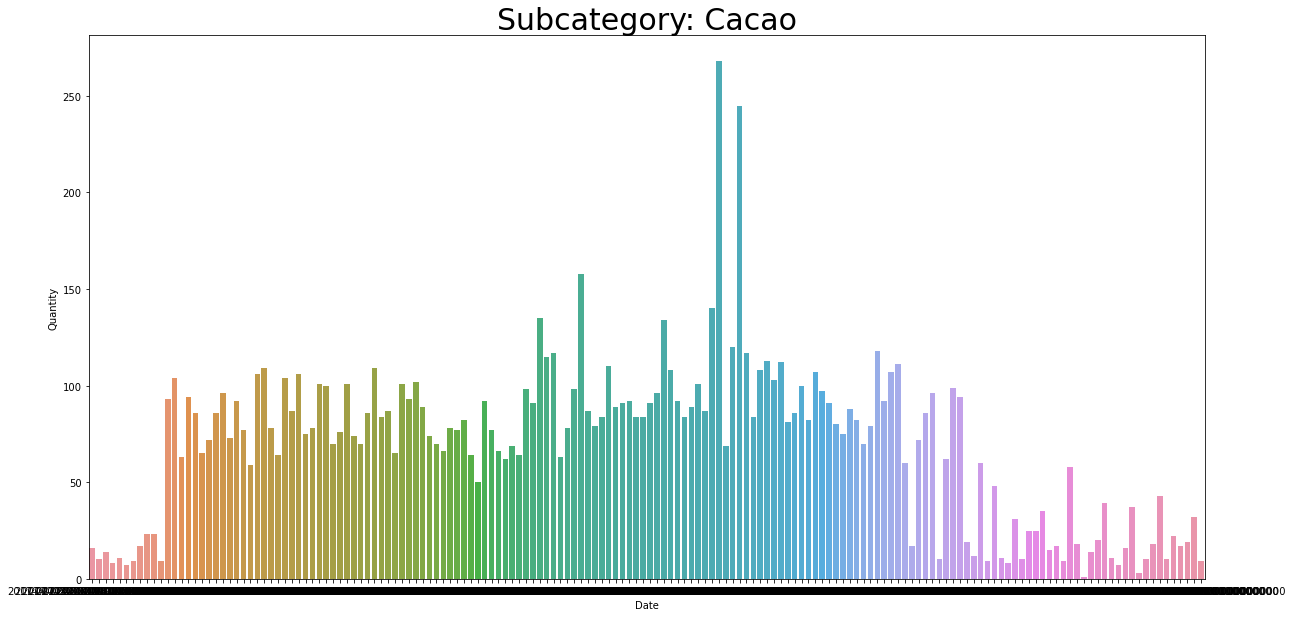

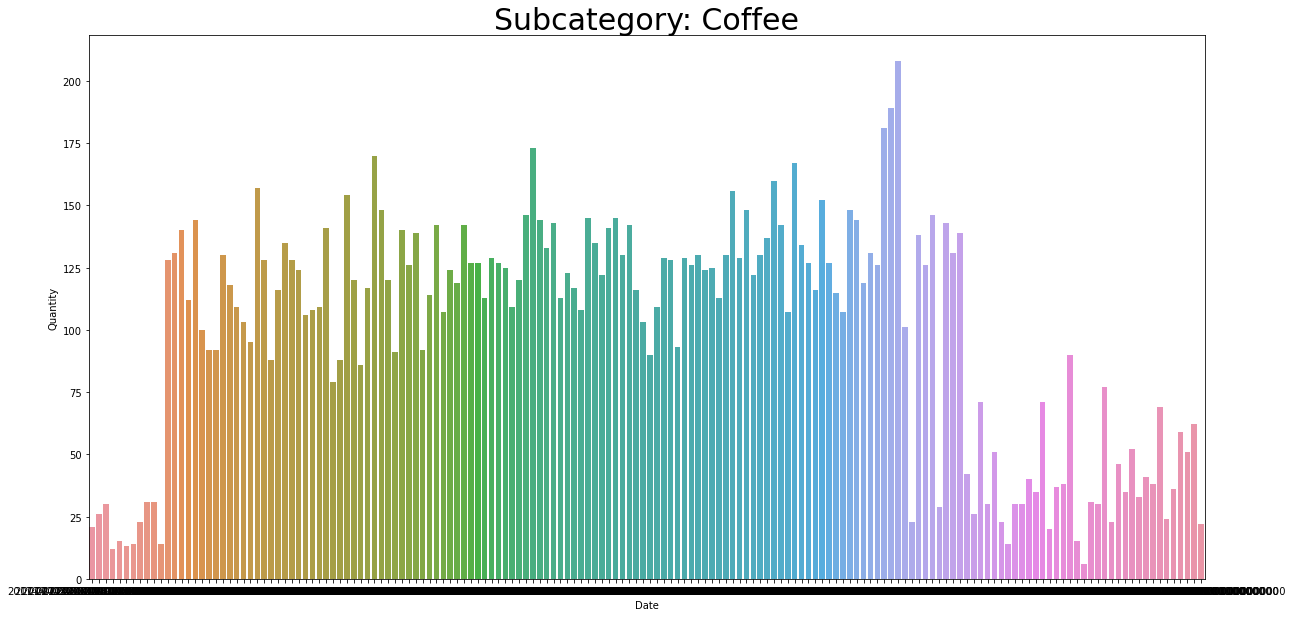

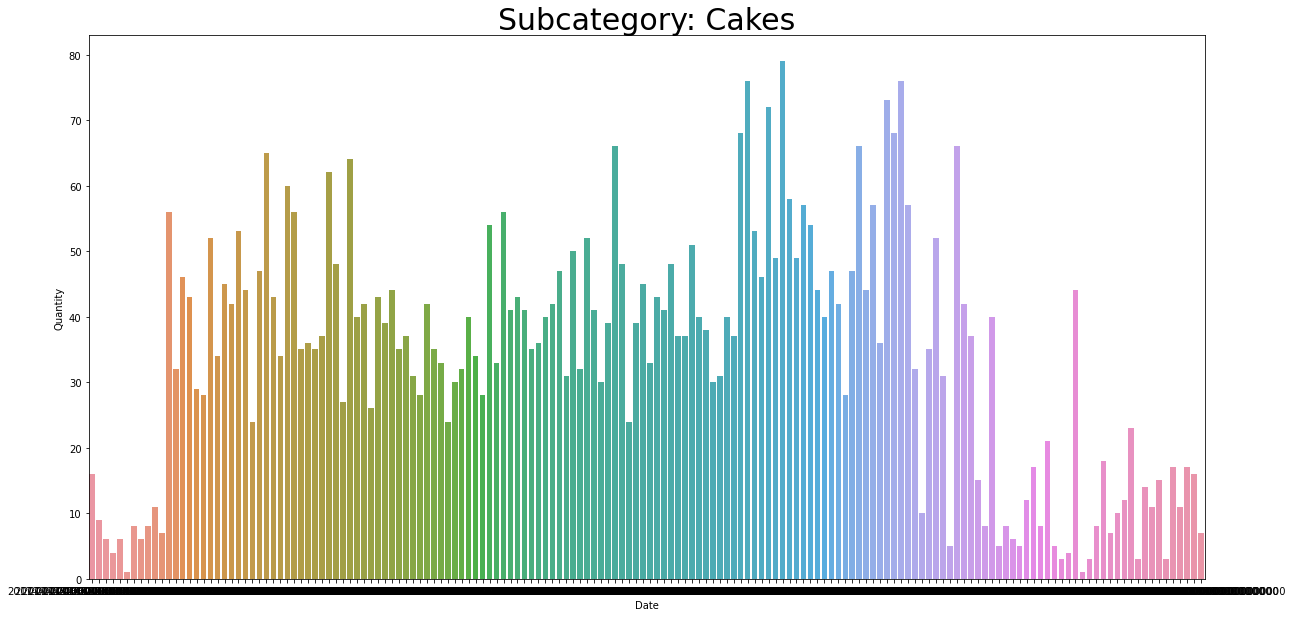

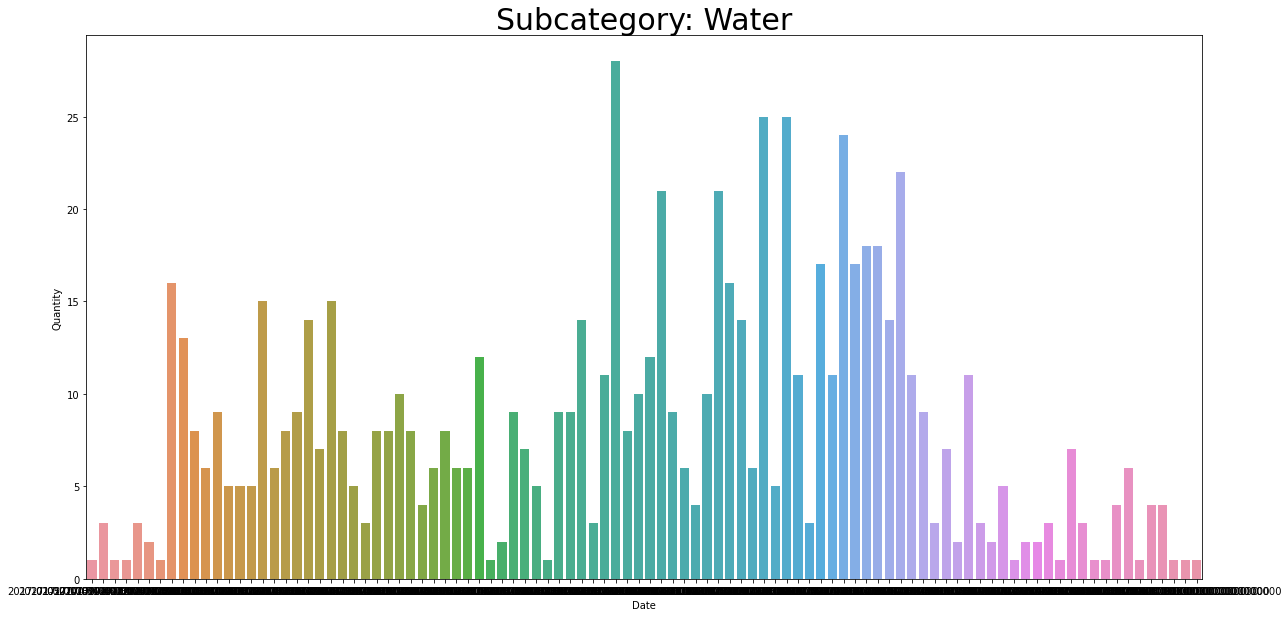

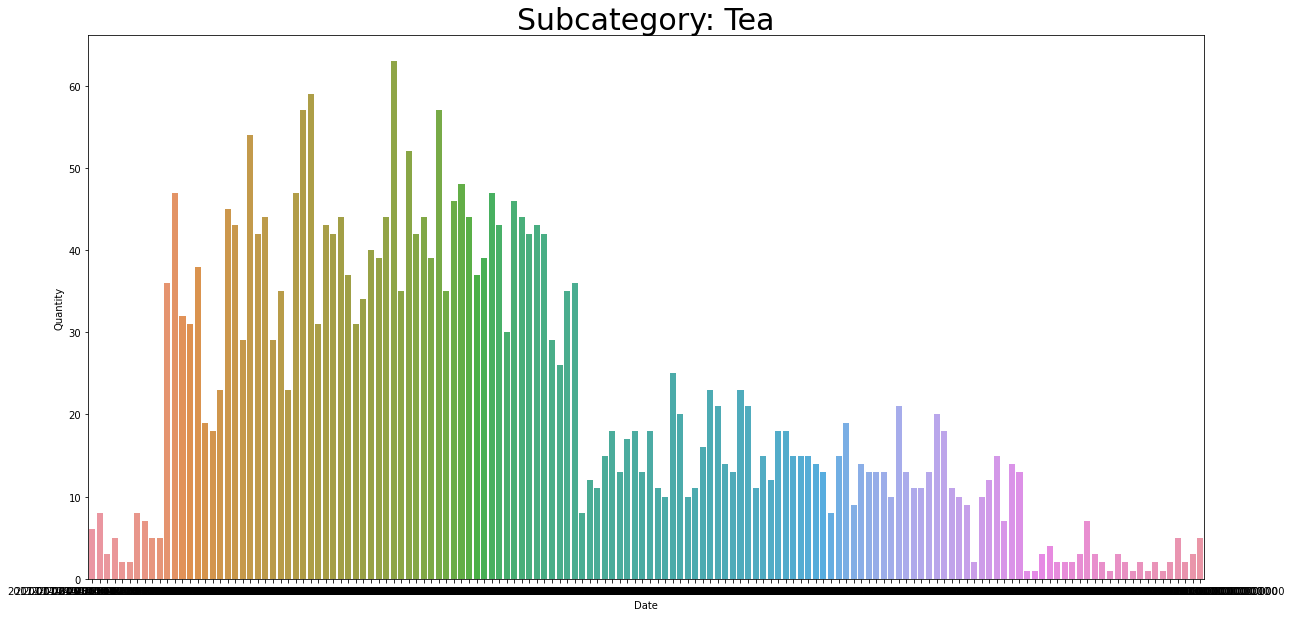

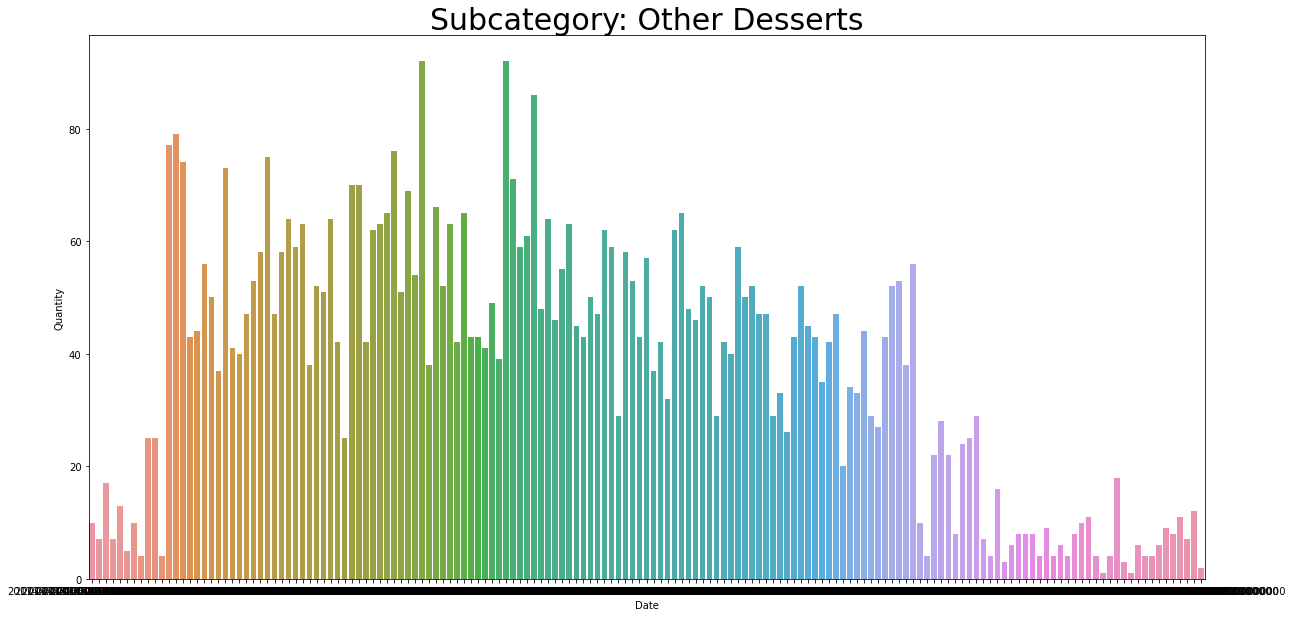

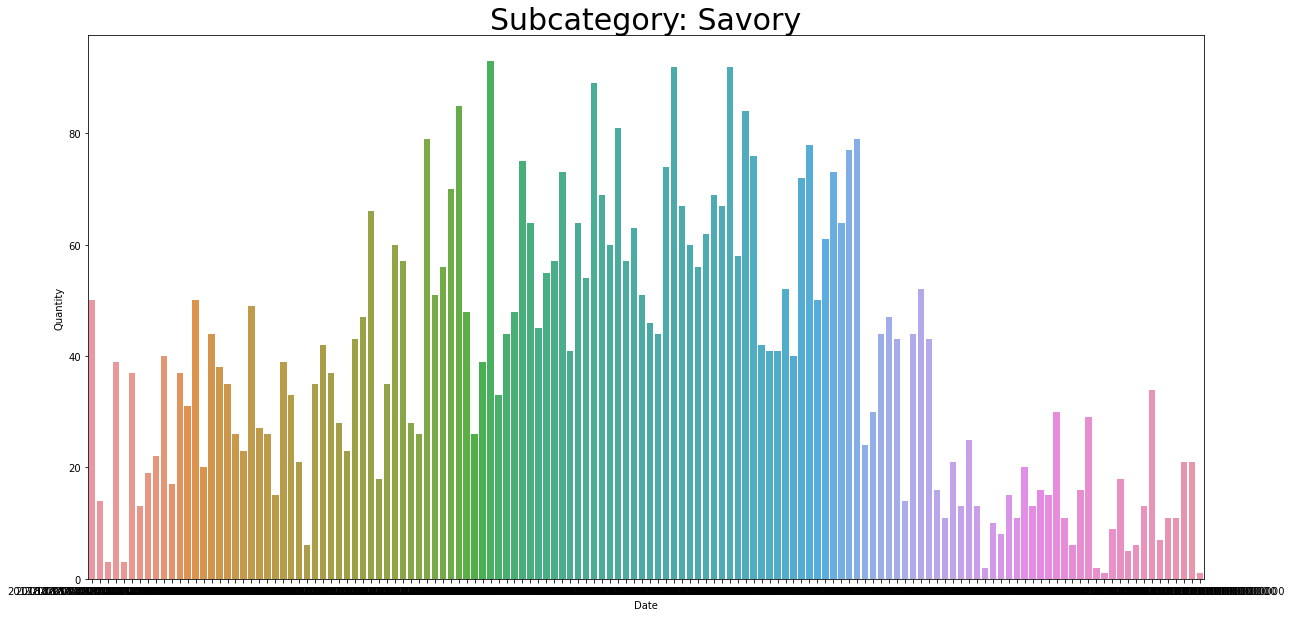

In [230]:
for i in subcategory_dict:
    #plt.subplot(row_nums, col_nums, i)
    fig=plt.figure(figsize=(20,10))
    sns.barplot(subcategory_dict[i]['Date'], subcategory_dict[i]['Quantity'])
    plt.savefig('subcategory_demand.png', bbox_inches='tight')
    plt.xlabel('Date')
    plt.title(f'Subcategory: {i}', size=30)

# Formatting the data for Prophet

Prophet only accepts a specific format where there are only 2 columns: `ds` and `y`. Let's reformat it for the next notebook.

In [231]:
cakes = subcategory_dict['Cakes']
cakes.drop(columns='Subcategory',inplace=True)
cakes

,Date,Quantity
162,2017-01-02,16.0
163,2017-01-30,9.0
164,2017-02-27,6.0
165,2017-04-03,4.0
166,2017-05-01,6.0
...,...,...
317,2020-11-02,17.0
318,2020-11-09,11.0
319,2020-11-16,17.0
320,2020-11-23,16.0


In [235]:
# renaming columns for Prophet
cakes.rename(columns={"Date": "ds", "Quantity": "y"},inplace=True)

### And here is the shape of our cakes df.

In [234]:
cakes.shape

(160, 2)

## Let's use pandas to export it so we can use it for modelling in the next notebook.

In [237]:
cakes.to_csv('data\cakes_weekly.csv', index=False)

---



Please see the notebook: `2. Modelling with Prophet & Model Evaluation with Sklearn` for the continuation of this project.